<center><h1>Liu_Pei-Jou_HW1</h1></center>
<br>
<center><h1>USC ID: 7384221314</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import accuracy_score

Get the Vertebral Column Data Set

In [78]:
data = arff.loadarff("column_2C_weka.arff")
df = pd.DataFrame(data[0])
df.head()

df["class"] = df["class"].replace({b"Normal": 0, b"Abnormal": 1})
df = df.replace({b"Normal": 0, b"Abnormal": 1})
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

/Users/pearlliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


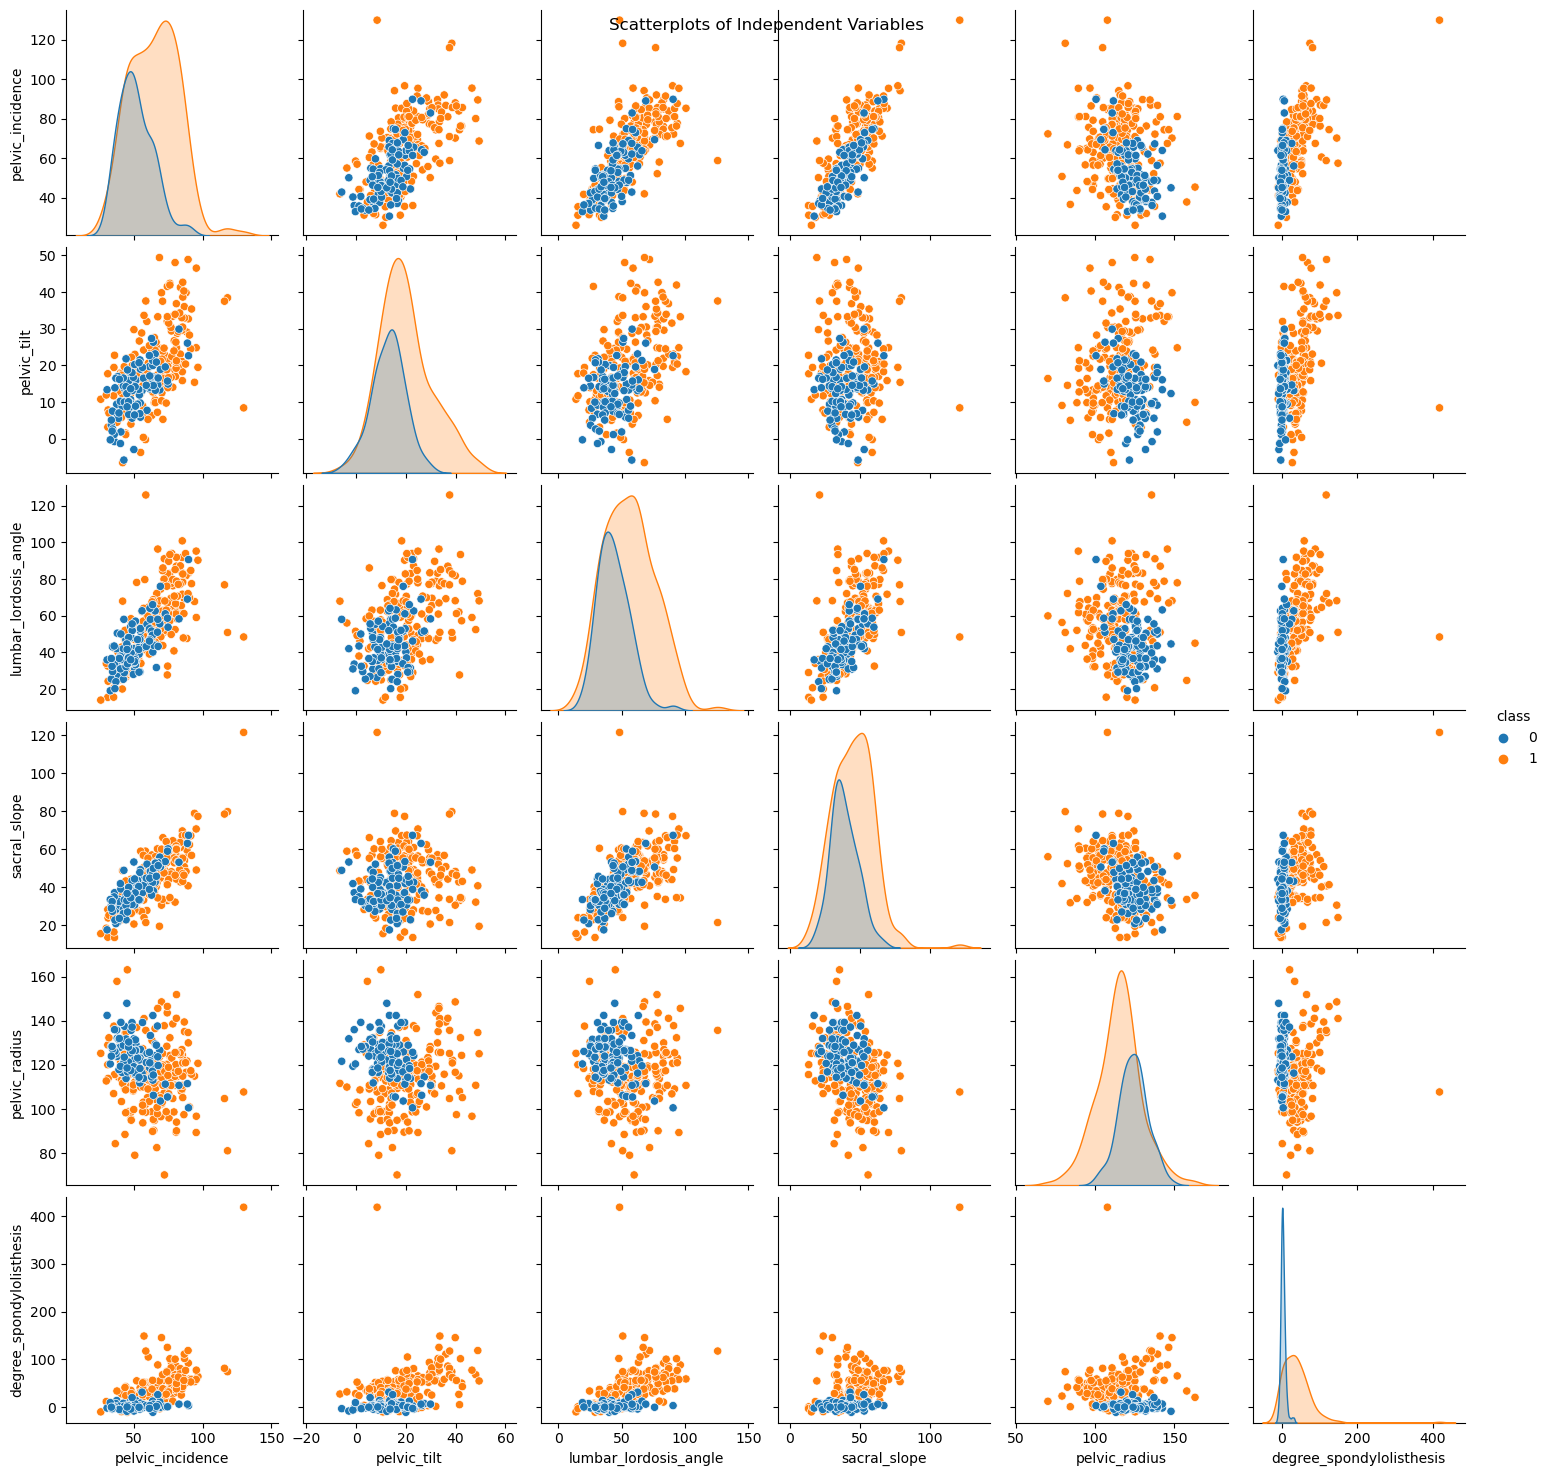

In [79]:
sns.pairplot(data = df, hue = "class")
plt.suptitle("Scatterplots of Independent Variables")
plt.show()

#### ii. Boxplots

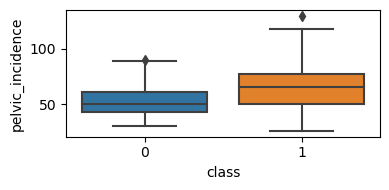

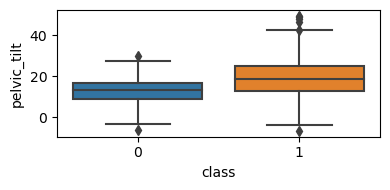

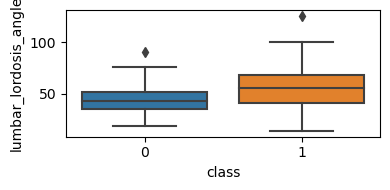

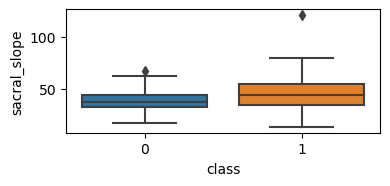

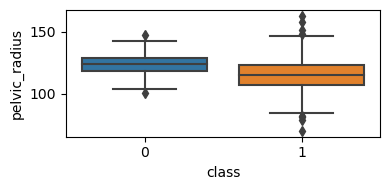

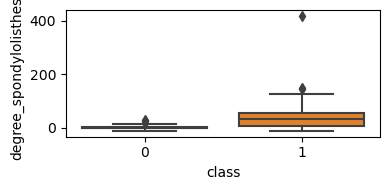

In [80]:
y_columns = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]

for col in y_columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x="class", y=col, data=df, dodge=False)
    plt.tight_layout()
    plt.show()

#### iii. Split Data Set

In [81]:
class0 = df[df["class"] == 0].iloc[:70]
class1 = df[df["class"] == 1].iloc[:140]

train_df = pd.concat([class0, class1])
test_df = df.drop(train_df.index)

train_x = train_df.iloc[:,:-1]
train_y = train_df["class"]
re_x = test_df.iloc[:,:-1]
re_y = test_df["class"]

print("Training set:", train_x.shape[0])
print("Test set:", re_x.shape[0])

Training set: 210
Test set: 100


### (c) Classification

#### i. Euclidean Metric, ii. Test Data

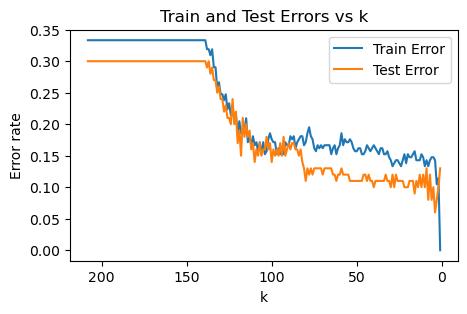

Best k = 4
Confusion Matrix: [[25  5]
 [ 1 69]]
True Positive Rate: 0.96
True Negative Rate: 0.93
Precision: 0.83
F1-score: 0.89


In [83]:
trainx_np = train_x.to_numpy()
testx_np  = re_x.to_numpy()

trainy_np = np.asarray(train_y).ravel()
testy_np  = np.asarray(re_y).ravel()

k_val = list(range(208, 0, -1))
train_errors = []
test_errors = []

for k in k_val:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(trainx_np, trainy_np)
    train_ypred = knn.predict(trainx_np)
    test_ypred  = knn.predict(testx_np)

    train_errors.append(np.mean(train_ypred != trainy_np))
    test_errors.append(np.mean(test_ypred  != testy_np))

plt.figure(figsize=(5, 3))
plt.plot(k_val, train_errors, label="Train Error")
plt.plot(k_val, test_errors, label="Test Error")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.title("Train and Test Errors vs k")
plt.legend()
plt.gca().invert_xaxis()
plt.show()

# Best k
k_star = k_val[np.argmin(test_errors)]
print("Best k =", k_star)

# Metrics at k
knn_best = KNeighborsClassifier(n_neighbors=k_star, metric="euclidean")
knn_best.fit(trainx_np, trainy_np)
y_test_pred_best = knn_best.predict(testx_np)

cm = confusion_matrix(re_y, y_test_pred_best)
print("Confusion Matrix:", cm)

# Confusion matrix
TP = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[1, 1]

# true positive rate
TPR = TP / (TP + FN)
print("True Positive Rate: {}".format(round(TPR, 2)))

# true negative rate
TNR = TN / (TN + FP)
print("True Negative Rate: {}".format(round(TNR, 2)))

# precision
pre = TP / (TP + FP)
print("Precision: {}".format(round(pre, 2)))

#F1-score
f1 = 2 * (pre * TPR) / (pre + TPR)
print("F1-score: {}".format(round(f1, 2)))

#### iii. Learning Curve

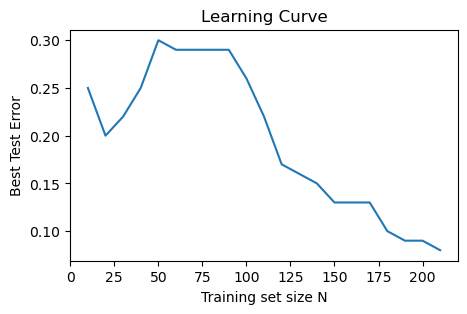

In [84]:
n_val = list(range(10, 211, 10))
best_test_error = []

for n in n_val:
    n_class0 = n // 3
    n_class1 = n - n_class0

    train_sub = pd.concat([class0.iloc[:n_class0], class1.iloc[:n_class1]])
    trainx_sub, trainy_sub = train_sub.iloc[:, :-1], train_sub["class"]

    trainx_sub_np = trainx_sub.to_numpy()
    trainy_sub_np = np.ravel(trainy_sub)
    testx_np = re_x.to_numpy()

    max_k = len(trainx_sub_np)
    k_sub = [k for k in range(1, N, 5) if k <= max_k]
    test_sub = []

    for k in k_sub:
        knn_sub = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn_sub.fit(trainx_sub_np, trainy_sub_np)
        y_test_pred_sub = knn_sub.predict(testx_np)
        test_error_sub = np.mean(y_test_pred_sub != re_y)
        test_sub.append(test_error_sub)

    best_test_error.append(min(test_sub))

plt.figure(figsize=(5, 3))
plt.plot(n_val, best_test_error)
plt.xlabel("Training set size N")
plt.ylabel("Best Test Error")
plt.title("Learning Curve")
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

In [85]:
def find_best_k(train_x, train_y, re_x, re_y, k_val, metric="euclidean", metric_params=None, **kwargs):
    best_acc, best_k = -1.0, None
    for k in k_val:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, metric_params=metric_params, **kwargs)
        knn.fit(train_x, train_y)
        y_pred = knn.predict(re_x)
        acc = accuracy_score(re_y, y_pred)
        if acc > best_acc:
            best_acc, best_k = acc, k
    return best_k, best_acc


def find_best_p(train_x, train_y, re_x, re_y, p_values, fixed_k, metric="minkowski"):
    best_acc = -1.0
    best_p = None
    for p in p_values:
        knn = KNeighborsClassifier(n_neighbors=fixed_k, metric=metric, p=p)
        knn.fit(train_x, train_y)
        y_pred = knn.predict(re_x)
        acc = accuracy_score(re_y, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_p = p
    return best_p, best_acc


k_val = list(range(1, 197, 5))  # {1, 6, 11, ..., 196}
results = []

##### A. Manhattan Distance with p = 1.

In [86]:
best_k_manhattan, best_acc_manhattan = find_best_k(
    train_x.to_numpy(), np.ravel(train_y),
    re_x.to_numpy(),  np.ravel(re_y),
    k_values, metric="minkowski", p=1
)
results.append(["Manhattan", best_k_manhattan, 1 - best_acc_manhattan])

print("k = {}, accuracy = {}, test error = {:.2f}".format(best_k_manhattan, best_acc_manhattan, 1 - best_acc_manhattan))

k = 1, accuracy = 0.89, test error = 0.11


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [87]:
if best_k_manhattan is None:
    raise RuntimeError("best_k_manhattan not found -- check training/test split or data.")

p_candidates = [10**x for x in np.arange(0.1, 1.01, 0.1)]
best_p, best_acc_p = find_best_p(
    train_x, train_y, re_x, re_y, p_candidates, fixed_k=best_k_manhattan
)
if best_p is None:
    results.append([f"Minkowski log10(p)=N/A", best_k_manhattan, 1 - best_acc_p])
else:
    results.append([f"Minkowski log10(p)={np.log10(best_p):.1f}", best_k_manhattan, 1 - best_acc_p])

print("k = {}, accuracy = {:.2f}, test error = {:.2f}".format(best_k_manhattan, best_acc_manhattan, 1 - best_acc_manhattan))


k = 1, accuracy = 0.89, test error = 0.11


##### C. Chebyshev Distance With p -> infinity.

In [88]:
best_k_chebyshev, best_acc_chebyshev = find_best_k(
    train_x.to_numpy(), np.ravel(train_y),
    re_x.to_numpy(),  np.ravel(re_y),
    k_val, metric="chebyshev"
)
results.append(["Chebyshev", best_k_chebyshev, 1 - best_acc_chebyshev])

print("k = {}, accuracy = {}, test error = {:.2f}".format(best_k_chebyshev, best_acc_chebyshev, 1 - best_acc_chebyshev))

k = 16, accuracy = 0.92, test error = 0.08


#### ii. Mahalanobis Distance.

In [89]:
Xtr = np.asarray(train_x, dtype=float)
Xte = np.asarray(re_x, dtype=float)
VI = np.linalg.pinv(np.cov(Xtr.T)) 

best_k_mahalanobis, best_acc_mahalanobis = find_best_k(
    Xtr, train_y, Xte, re_y, k_val, metric="mahalanobis", metric_params={"VI": VI}
)
results.append(["Mahalanobis", best_k_mahalanobis, 1 - best_acc_mahalanobis])

results_df = pd.DataFrame(results, columns=["Metric", "Best k", "Test Error"])
print(results_df.to_string(index=False))


                Metric  Best k  Test Error
             Manhattan       1        0.11
Minkowski log10(p)=0.7       1        0.11
             Chebyshev      16        0.08
           Mahalanobis       1        0.15


### (e) Weighted Decision

In [90]:
k_weighted = list(range(1, 197, 5))
weighted_results = []

for metric in ["euclidean", "manhattan", "chebyshev"]:
    best_k, best_acc = find_best_k(
        train_x, train_y, re_x, re_y, k_weighted, metric=metric, weights="distance"
    )
    weighted_results.append([metric.capitalize(), best_k, 1 - best_acc])

weighted_df = pd.DataFrame(weighted_results, columns=["Metric", "Best k", "Best Test Error"])
print(weighted_df.to_string(index=False))

   Metric  Best k  Best Test Error
Euclidean       6             0.10
Manhattan      26             0.10
Chebyshev      16             0.11


### (f) Training Error Rate

In [91]:
min_train_knn = min(train_errors)
print("Lowest training error rate achieved.")
print("Minimum training error rate = {}".format(round(min_train_knn, 2)))

Lowest training error rate achieved.
Minimum training error rate = 0.0


Reference

https://github.com/woojeongjin/HW0/blob/main/INF-552%20Lab0.ipynb

https://seaborn.pydata.org/generated/seaborn.boxplot.html 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.axes.html

https://seaborn.pydata.org/examples/horizontal_boxplot.html

https://scikit-learn.org/stable/modules/neighbors.html

https://tako-analytics.com/2024-03-21-data-science-what-is-confusion-matrix-model-evaluation-metric/

https://blog.csdn.net/weixin_48846514/article/details/141469607

https://ithelp.ithome.com.tw/m/articles/10274608

https://flag-editors.medium.com/機器學習看得見lesson-11-算euclidean-distance找離群值-你該試試mahalanobis-distance了-5f8819f94c7f


